In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains number of wins for a given team in the 2014 Major League Baseball seasons along with the features of game of Baseball on which the number of wins is supposed to depend. A machine learning model can be prepared from the dataset to pedict the number of wins for a given team in the 2015 Major League Baseball seasons.

# Features Description

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA),Complete Games, Shutouts, Saves, and Errors

Output: Number of predicted wins (W)

In [2]:
df = pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Let's replace the acronyms from the feature names

In [5]:
feature_names = {"W":"Wins","R":"Runs","AB":"At Bats","H":"Hits","2B":"Doubles","3B":"Triples","HR":"Homeruns","BB":"Walks","SO":"Strikeouts","SB":"Stolen Bases","RA":"Runs Allowed","ER":"Earned Runs","ERA":"Earned Run Average","CG":"Complete Games","SHO":"Shutouts","SV":"Saves","E":"Errors"}
feature_names

{'W': 'Wins',
 'R': 'Runs',
 'AB': 'At Bats',
 'H': 'Hits',
 '2B': 'Doubles',
 '3B': 'Triples',
 'HR': 'Homeruns',
 'BB': 'Walks',
 'SO': 'Strikeouts',
 'SB': 'Stolen Bases',
 'RA': 'Runs Allowed',
 'ER': 'Earned Runs',
 'ERA': 'Earned Run Average',
 'CG': 'Complete Games',
 'SHO': 'Shutouts',
 'SV': 'Saves',
 'E': 'Errors'}

In [6]:
df.rename(index=str,columns=feature_names,inplace=True)
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors         

Let's look into the distribution of all features

In [26]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Text(0.5, 1.0, 'Number of Wins - Histogram')

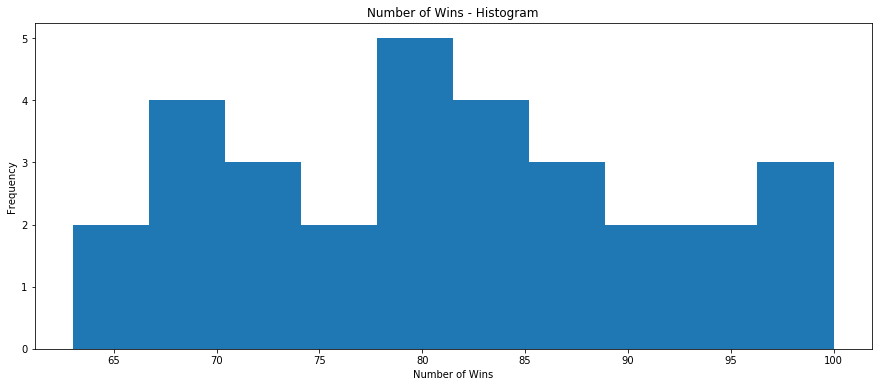

In [60]:
plt.figure(figsize=(15,6))
plt.hist(df["Wins"])
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.title('Number of Wins - Histogram')

The team has highest number of wins around the mean

Text(0.5, 1.0, 'Runs - Histogram')

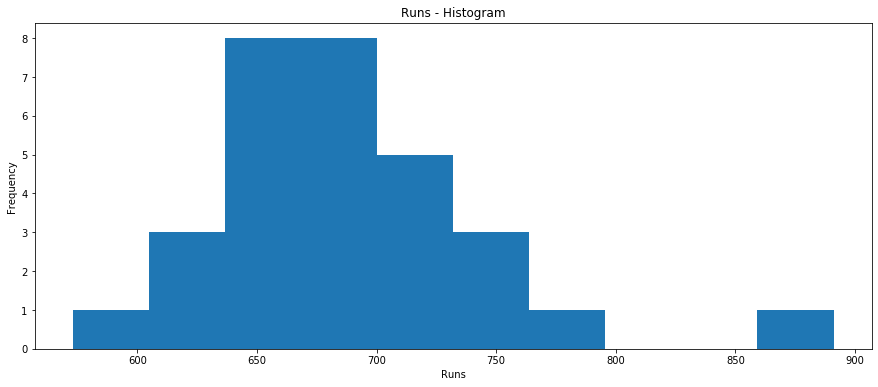

In [61]:
plt.figure(figsize=(15,6))
plt.hist(df["Runs"])
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Runs - Histogram')

Distribution of runs approximates normal distribution with an outlier

Text(0.5, 1.0, 'At Bats - Histogram')

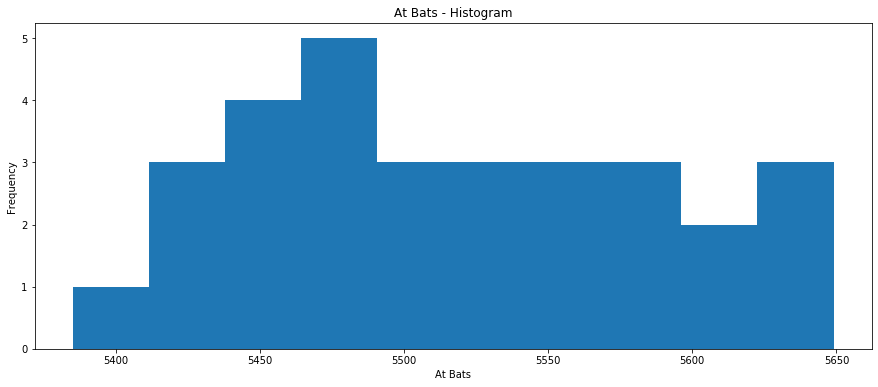

In [62]:
plt.figure(figsize=(15,6))
plt.hist(df["At Bats"])
plt.xlabel('At Bats')
plt.ylabel('Frequency')
plt.title('At Bats - Histogram')

Text(0.5, 1.0, 'Hits - Histogram')

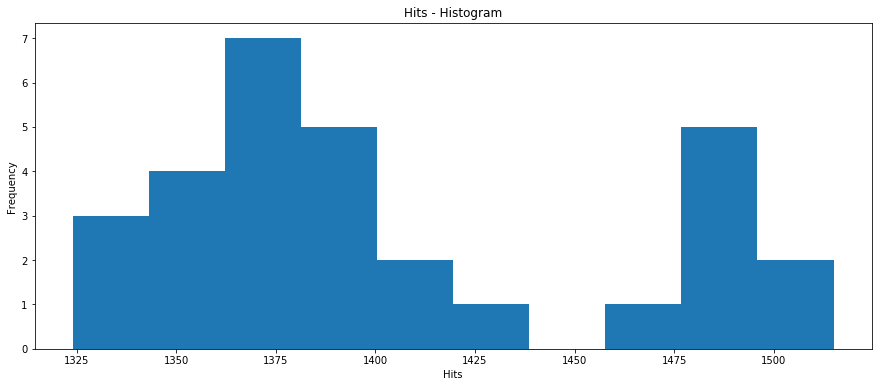

In [63]:
plt.figure(figsize=(15,6))
plt.hist(df["Hits"])
plt.xlabel('Hits')
plt.ylabel('Frequency')
plt.title('Hits - Histogram')

Text(0.5, 1.0, 'Doubles - Histogram')

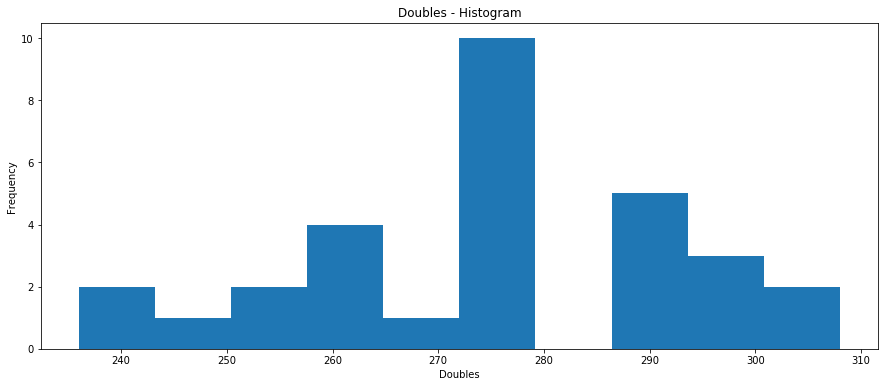

In [64]:
plt.figure(figsize=(15,6))
plt.hist(df["Doubles"])
plt.xlabel('Doubles')
plt.ylabel('Frequency')
plt.title('Doubles - Histogram')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors         

Text(0.5, 1.0, 'Triples - Histogram')

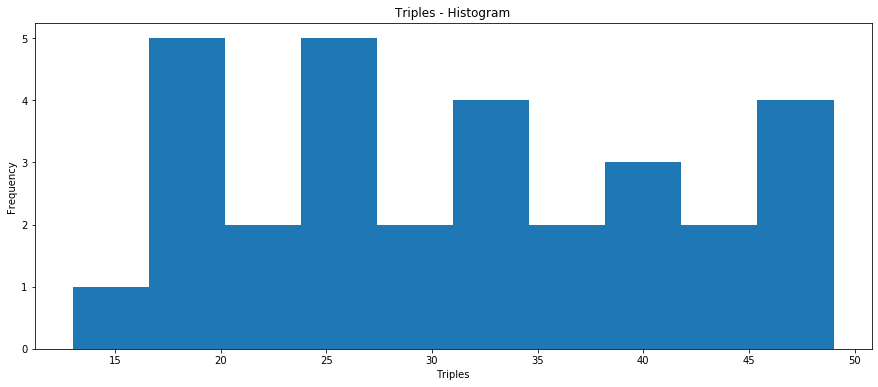

In [66]:
plt.figure(figsize=(15,6))
plt.hist(df["Triples"])
plt.xlabel('Triples')
plt.ylabel('Frequency')
plt.title('Triples - Histogram')

Text(0.5, 1.0, 'Homeruns - Histogram')

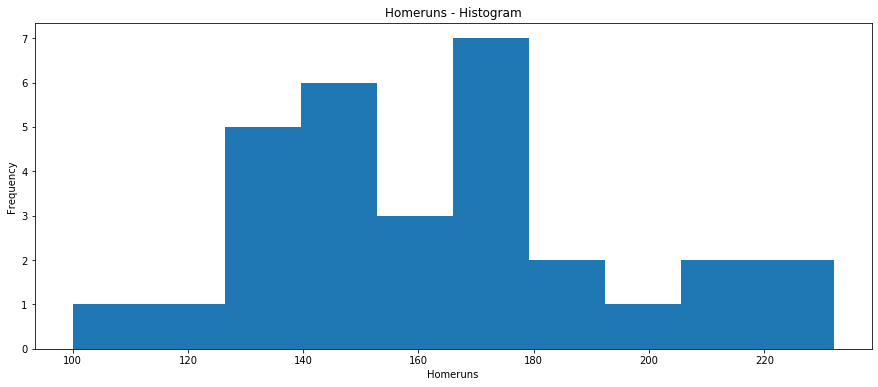

In [67]:
plt.figure(figsize=(15,6))
plt.hist(df["Homeruns"])
plt.xlabel('Homeruns')
plt.ylabel('Frequency')
plt.title('Homeruns - Histogram')

Text(0.5, 1.0, 'Walks - Histogram')

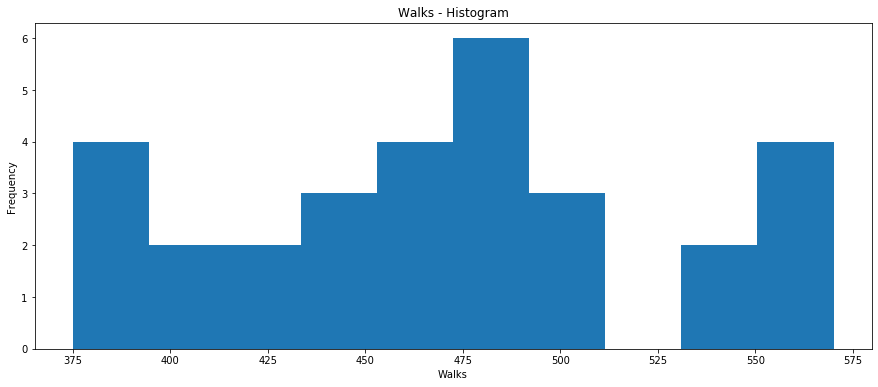

In [68]:
plt.figure(figsize=(15,6))
plt.hist(df["Walks"])
plt.xlabel('Walks')
plt.ylabel('Frequency')
plt.title('Walks - Histogram')

Text(0.5, 1.0, 'Strikeouts - Histogram')

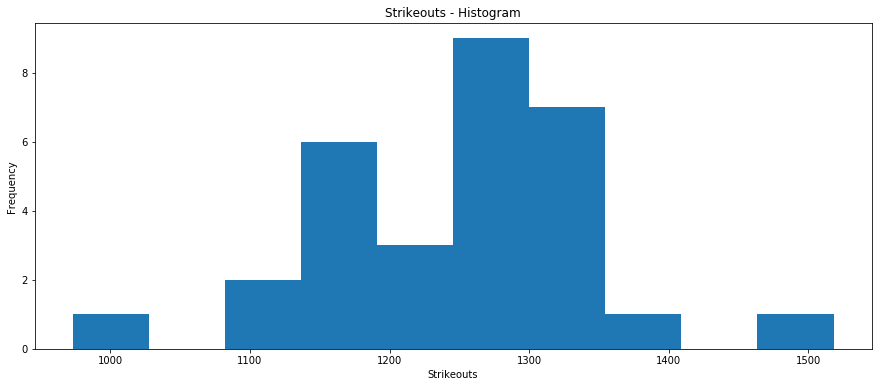

In [69]:
plt.figure(figsize=(15,6))
plt.hist(df["Strikeouts"])
plt.xlabel('Strikeouts')
plt.ylabel('Frequency')
plt.title('Strikeouts - Histogram')

Text(0.5, 1.0, 'Stolen Bases - Histogram')

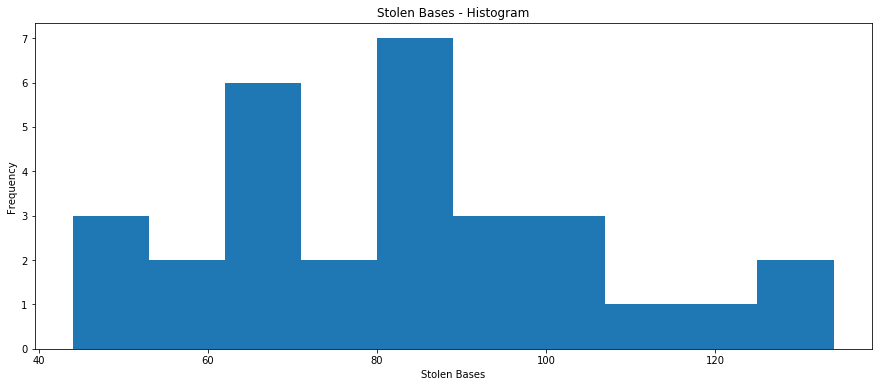

In [70]:
plt.figure(figsize=(15,6))
plt.hist(df["Stolen Bases"])
plt.xlabel('Stolen Bases')
plt.ylabel('Frequency')
plt.title('Stolen Bases - Histogram')

Text(0.5, 1.0, 'Runs Allowed - Histogram')

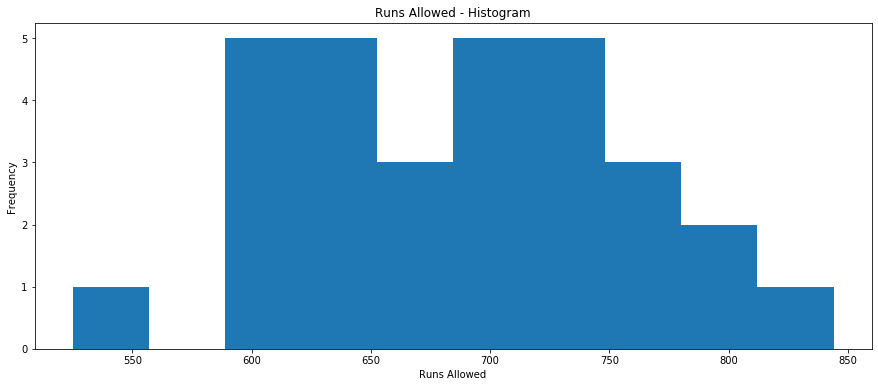

In [71]:
plt.figure(figsize=(15,6))
plt.hist(df["Runs Allowed"])
plt.xlabel('Runs Allowed')
plt.ylabel('Frequency')
plt.title('Runs Allowed - Histogram')

Text(0.5, 1.0, 'Earned Runs - Histogram')

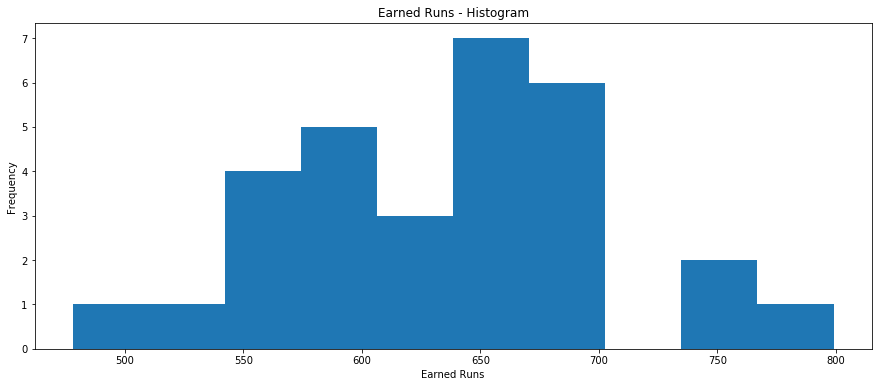

In [72]:
plt.figure(figsize=(15,6))
plt.hist(df["Earned Runs"])
plt.xlabel('Earned Runs')
plt.ylabel('Frequency')
plt.title('Earned Runs - Histogram')

Text(0.5, 1.0, 'Earned Run Average - Histogram')

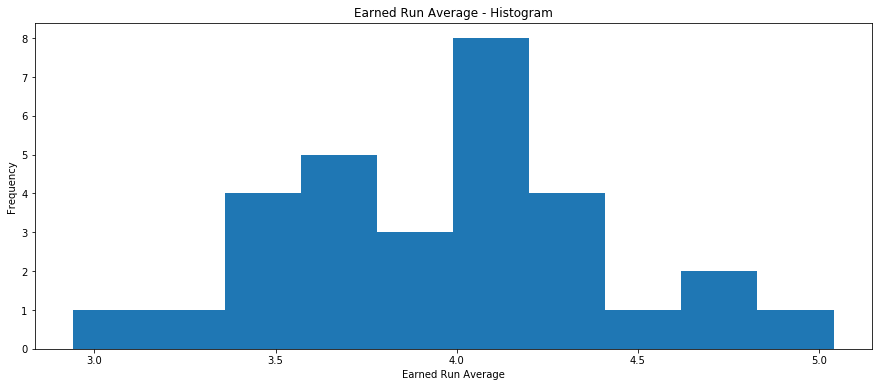

In [73]:
plt.figure(figsize=(15,6))
plt.hist(df["Earned Run Average"])
plt.xlabel('Earned Run Average')
plt.ylabel('Frequency')
plt.title('Earned Run Average - Histogram')

Text(0.5, 1.0, 'Complete Games - Histogram')

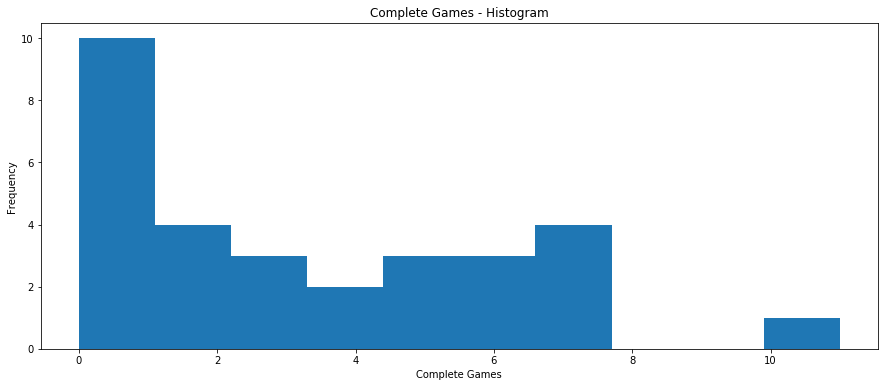

In [74]:
plt.figure(figsize=(15,6))
plt.hist(df["Complete Games"])
plt.xlabel('Complete Games')
plt.ylabel('Frequency')
plt.title('Complete Games - Histogram')

Text(0.5, 1.0, 'Shutouts - Histogram')

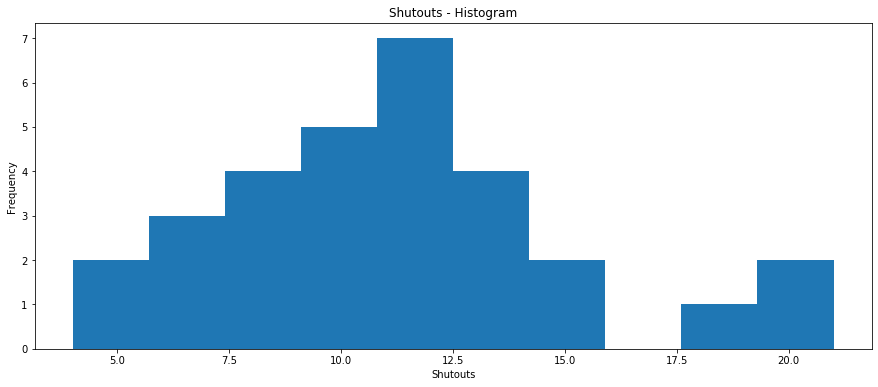

In [75]:
plt.figure(figsize=(15,6))
plt.hist(df["Shutouts"])
plt.xlabel('Shutouts')
plt.ylabel('Frequency')
plt.title('Shutouts - Histogram')

Text(0.5, 1.0, 'Saves - Histogram')

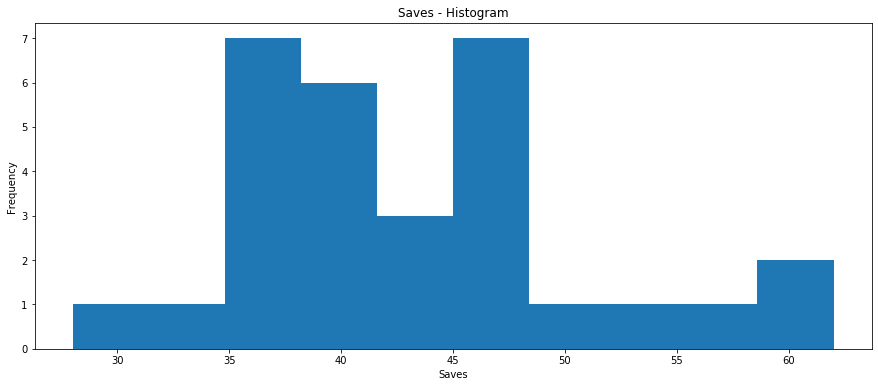

In [76]:
plt.figure(figsize=(15,6))
plt.hist(df["Saves"])
plt.xlabel('Saves')
plt.ylabel('Frequency')
plt.title('Saves - Histogram')

Text(0.5, 1.0, 'Errors - Histogram')

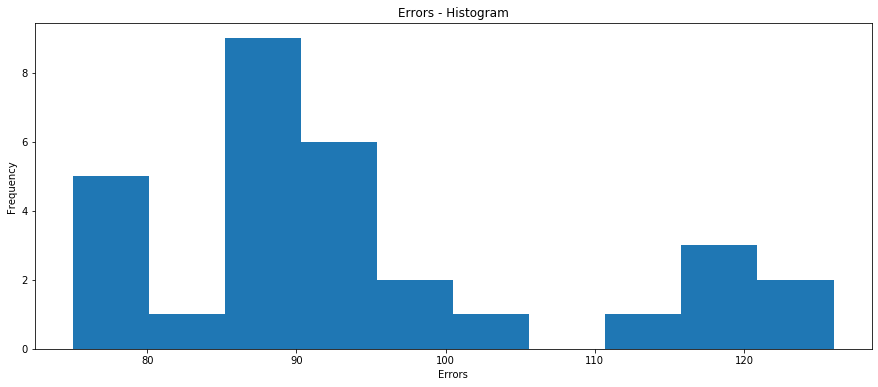

In [77]:
plt.figure(figsize=(15,6))
plt.hist(df["Errors"])
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Errors - Histogram')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors         

Let's look into the correlation matrix

In [79]:
dfcor = df.corr()
dfcor

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Let's visualise the correlation of the features

Text(0.5, 1, 'Correlation Visualization')

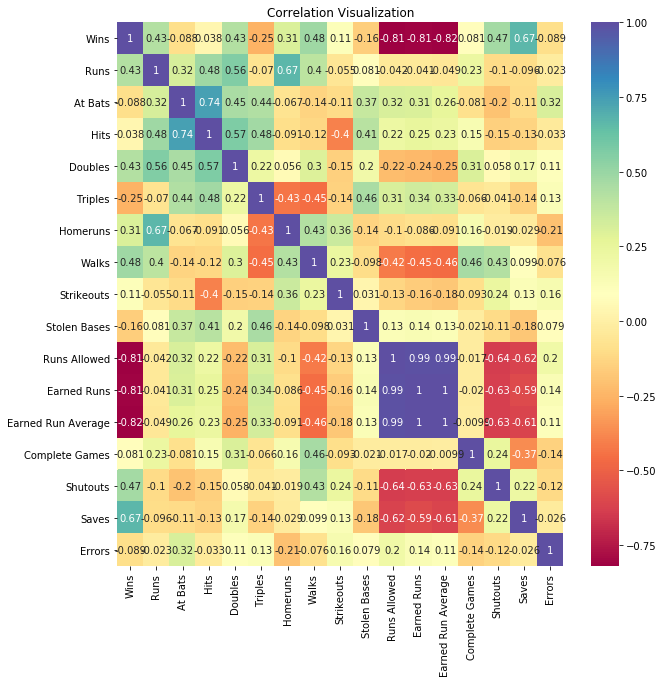

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,cmap='Spectral',annot=True)
plt.title('Correlation Visualization')

The number of wins for a team is strongly correlated with number of saves, moderately correlated with number of Walks, Shutouts, Runs, Doubles and very strongly negatively correlated with Earned Run Average, Earned Runs & Runs Allowed

Let's look into the scatter plots for these correlations

Text(0.5, 1.0, 'Wins vs Saves - Scatter Plot')

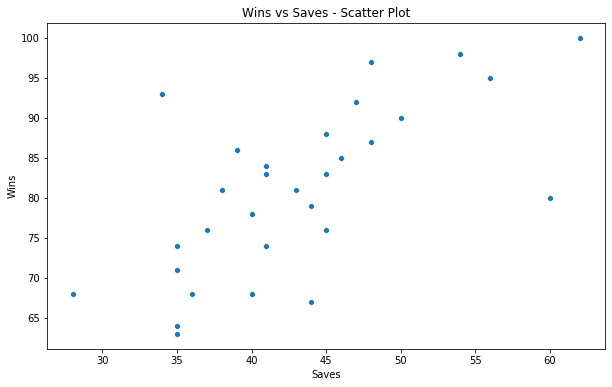

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Saves", y="Wins", data=df)
plt.title('Wins vs Saves - Scatter Plot')

Text(0.5, 1.0, 'Wins vs Walks - Scatter Plot')

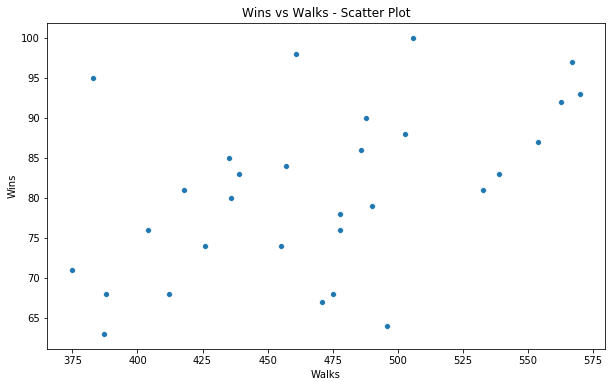

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Walks", y="Wins", data=df)
plt.title('Wins vs Walks - Scatter Plot')

Text(0.5, 1.0, 'Wins vs Earned Run Average - Scatter Plot')

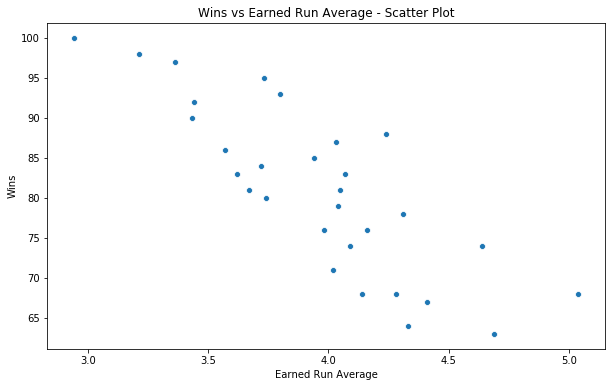

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Earned Run Average", y="Wins", data=df)
plt.title('Wins vs Earned Run Average - Scatter Plot')

Let's look into the descriptive statistics of the features

In [84]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Let's split the dataframe into input and output features for the model

In [85]:
X=df.drop("Wins", axis=1)
y=df["Wins"]

Let's scale the data using StandardScaler

In [86]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

Let's do Principal Component Analysis (PCA) for the input features

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (30, 16)
Reduced shape: (30, 2)


In [88]:
pca.components_.shape

(2, 16)

In [89]:
pca.components_

array([[-0.01316791,  0.22815101,  0.21109923, -0.03519152,  0.2512208 ,
        -0.1262697 , -0.2744095 , -0.14029145,  0.15367061,  0.42087297,
         0.42404197,  0.42074408, -0.0438515 , -0.30125696, -0.26088595,
         0.09802103],
       [ 0.44530434,  0.35585435,  0.44360489,  0.49677774,  0.14174824,
         0.15088921,  0.22809838, -0.09026753,  0.21458236, -0.0924855 ,
        -0.09156957, -0.10692921,  0.22240696,  0.06579767,  0.00120383,
         0.01573034]])

Let's look into break up of principal components in terms of original features using a heatmap

Text(0, 0.5, 'Principal components')

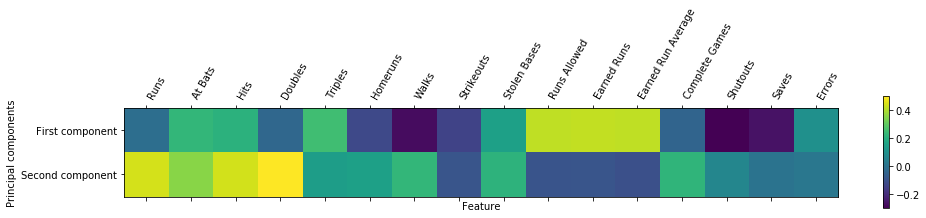

In [90]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
X.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Let's find the best random state for highest accuracy in terms of R2 score

In [187]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 72 is 0.9440890679202585


Let's split the dataset into training and test sets for different models

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.25,random_state=72)

In [189]:
print(X_train.shape,"\n",X_test.shape)

(22, 2) 
 (8, 2)


In [190]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [191]:
LR = LinearRegression()
RR = Ridge()#alpha=41
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor()

In [192]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [193]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=29, shuffle=True)

In [194]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.9440890679202585


Cross val score =  0.6488012585393677


Mean Squared error
 3.899787512561967


Mean absolute error 
1.672081908031405



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.9438121520365799


Cross val score =  0.770523497864927


Mean Squared error
 3.9191023954485544


Mean absolute error 
1.6461412052121904



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.941365962845612


Cross val score =  0.7073888519725924


Mean Squared error
 4.089724091518565


Mean absolute erro

In [195]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.944089,0.648801,3.899788,1.672082
1,Ridge,0.943812,0.770523,3.919102,1.646141
2,Lasso,0.941366,0.707389,4.089724,1.468471
3,KNeighborsRegressor,0.744875,0.363260,17.795000,3.275000
4,SVR,0.323475,-0.020626,47.187598,6.148829
5,DecisionTreeRegressor,0.306452,0.079650,48.375000,5.875000
6,RandomForestRegressor,0.840065,0.579501,11.155500,2.712500
7,AdaBoostRegressor,0.829328,0.525828,11.904384,2.913542
8,GradientBoostingRegressor,0.631857,0.309666,25.677993,4.433470
9,XGBoostRegressor,0.786381,0.511336,14.899907,2.956794


Linear Regression models give the best resuls on this dataset, Ridge regression has the best generalization performance as confirmed by cross validation score

Let's find the best parameters for the Ridge Regressor

In [196]:
from sklearn.model_selection import GridSearchCV
parameters = {
            'alpha': [30,41,50]
             }
grid = GridSearchCV(estimator=RR,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [30, 41, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
-0.0889916677248804
41
{'alpha': 41}


Saving the model

In [197]:
from sklearn.externals import joblib
joblib.dump(RR,'Baseball_Wins.csv')

['Baseball_Wins.csv']